In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Omkar/Desktop/all files/Programs/ML prac/Dataset/Iris.csv')
data = data.drop('Id', axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
81             5.5           2.4            3.7           1.0
59             5.2           2.7            3.9           1.4
126            6.2           2.8            4.8           1.8
78             6.0           2.9            4.5           1.5
49             5.0           3.3            1.4           0.2
94     Iris-versicolor
137     Iris-virginica
132     Iris-virginica
63     Iris-versicolor
90     Iris-versicolor
Name: Species, dtype: object


In [4]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

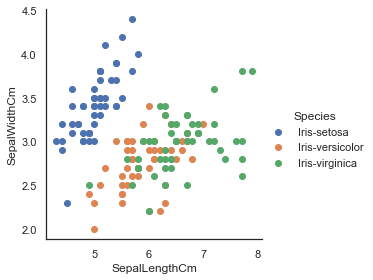

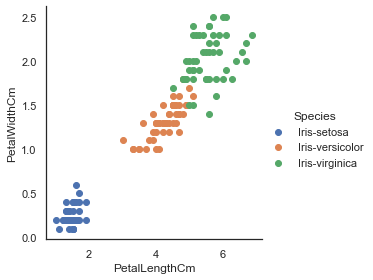

In [5]:
sns.FacetGrid(data, hue="Species", size=4) \
.map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
.add_legend();
sns.FacetGrid(data, hue="Species", size=4) \
.map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
.add_legend();

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
16,-0.537178,1.957669,-1.398138,-1.050031
47,-1.506521,0.337848,-1.341272,-1.312977
117,2.249683,1.726266,1.672610,1.316483
115,0.674501,0.337848,0.876490,1.447956
61,0.068662,-0.124958,0.250967,0.396172


In [8]:
from sklearn.cluster import KMeans
nclusters = 3
seed = 0
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4589717867018717

<AxesSubplot:ylabel='Density'>

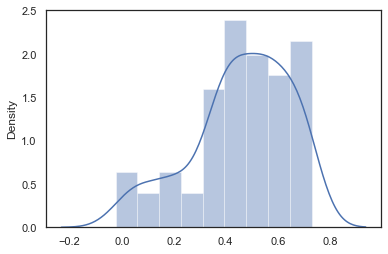

In [10]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores)

array([[<AxesSubplot:title={'center':'Iris-setosa'}>,
        <AxesSubplot:title={'center':'Iris-versicolor'}>],
       [<AxesSubplot:title={'center':'Iris-virginica'}>, <AxesSubplot:>]],
      dtype=object)

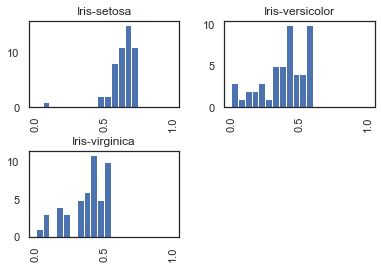

In [11]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = data['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20)

In [12]:
from sklearn.decomposition import PCA
ndimensions = 2
pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
81,0.014118,-1.573392
119,1.253981,-1.717584
61,0.438730,-0.058881
11,-2.327378,0.158587
129,1.864778,0.555382


In [13]:
y_id_array = pd.Categorical(data['Species']).codes
#Categorical.from_array(data['Species']).codes
df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.head(5)

,PC1,PC2,ClusterKmeans,SpeciesId
0,-2.264542,0.505704,1,0
1,-2.086426,-0.655405,1,0
2,-2.367950,-0.318477,1,0
3,-2.304197,-0.575368,1,0
4,-2.388777,0.674767,1,0


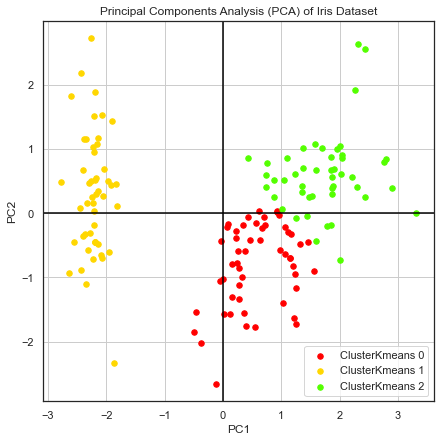

In [14]:
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the gro"
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax,
            kind = 'scatter',
            x = 'PC1', y = 'PC2',
            color = cmap(i/(nclusters-1)),
            label = "%s %i" % (groupby, i),
            s=30)
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset")
# plot the clusters each datapoint was assigned to
plotData(df_plot, 'ClusterKmeans')

In [15]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)
# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

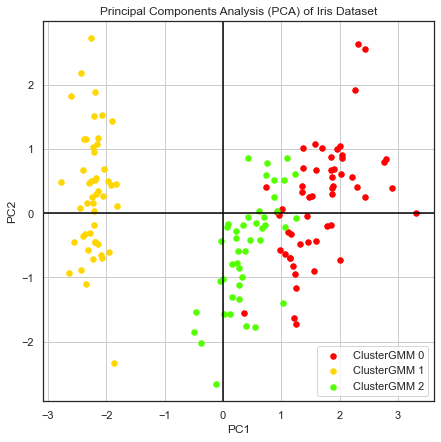

In [16]:
# add the GMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')